In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.stattools import coint

In [2]:
Xreturn = np.random.normal(0,1,100)
X = pd.Series(np.cumsum(Xreturn), name='X') + 50

In [3]:
noise = np.random.normal(0,1,100)
Y = X + 5 + noise
Y.name = 'Y'

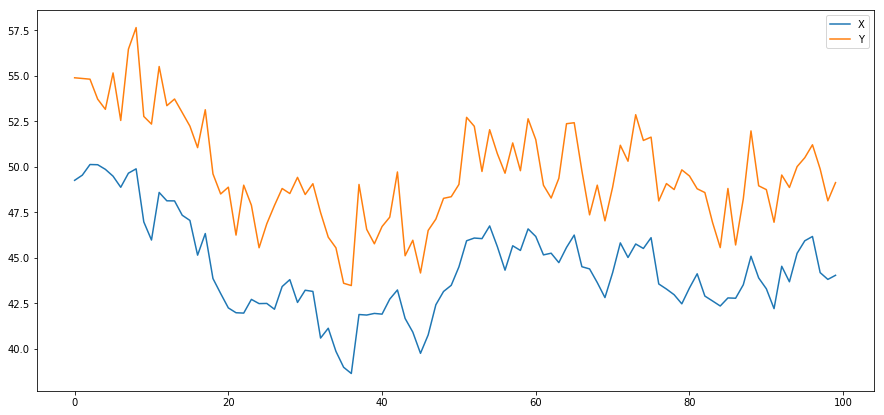

In [4]:
pd.concat([X,Y], axis=1).plot(figsize=(15,7))
plt.show()

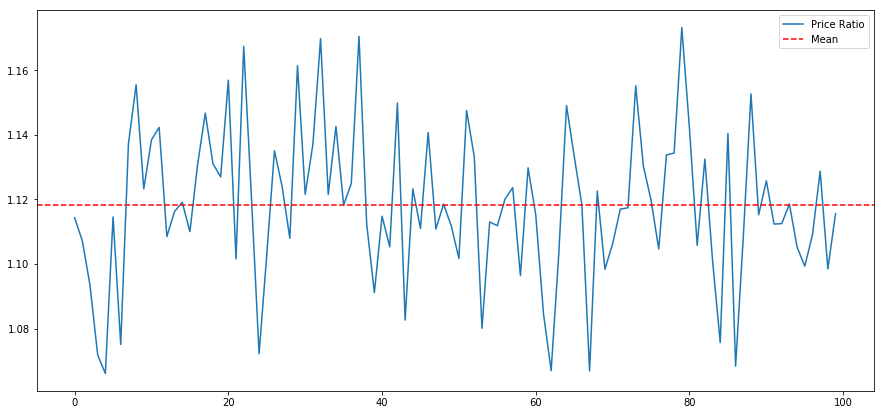

In [7]:
(Y/X).plot(figsize=(15,7))
plt.axhline((Y/X).mean(), color='r', linestyle='--')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

In [8]:
score, pvalue, _ = coint(X,Y)

In [9]:
pvalue

1.2523014417720938e-10

In [10]:
score

-7.752993334463777

In [12]:
from iexfinance.stocks import get_historical_data
from datetime import datetime

In [13]:
start = datetime(2013,1,1)
end = datetime(2018,1,1)

In [14]:
MSFT = get_historical_data("MSFT", start=start, end=end, output_format='pandas')
ADBE = get_historical_data("ADBE", start=start, end=end, output_format='pandas')

In [23]:
data = pd.DataFrame([ADBE.close, MSFT.close]).T
data.head()
data.columns = ['ADBE', 'MSFT']

In [19]:
data.head()

,ADBE,MSFT
date,,
2013-12-16,58.50,32.7078
2013-12-17,57.67,32.3841
2013-12-18,59.04,32.4373
2013-12-19,58.13,32.1447
2013-12-20,59.26,32.6324


In [27]:
S1 = data['ADBE']
S2 = data['MSFT']

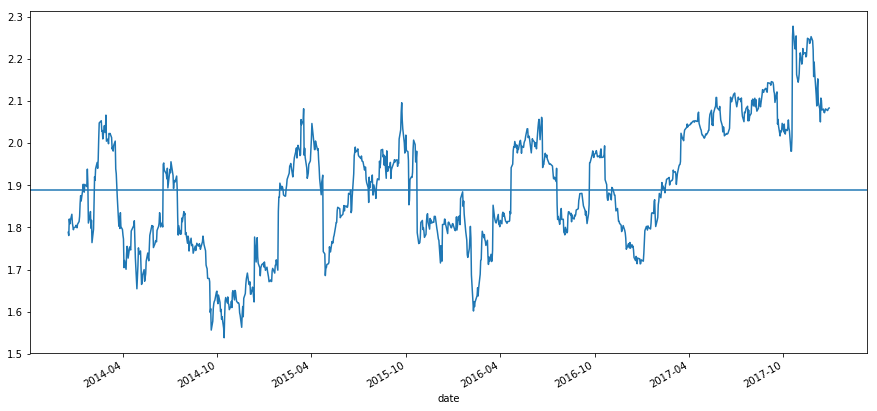

In [28]:
ratio = S1/S2
ratio.plot(figsize=(15,7))
plt.axhline(ratio.mean())
plt.show()

In [30]:
def zscore(series):
    return (series-series.mean())/np.std(series)

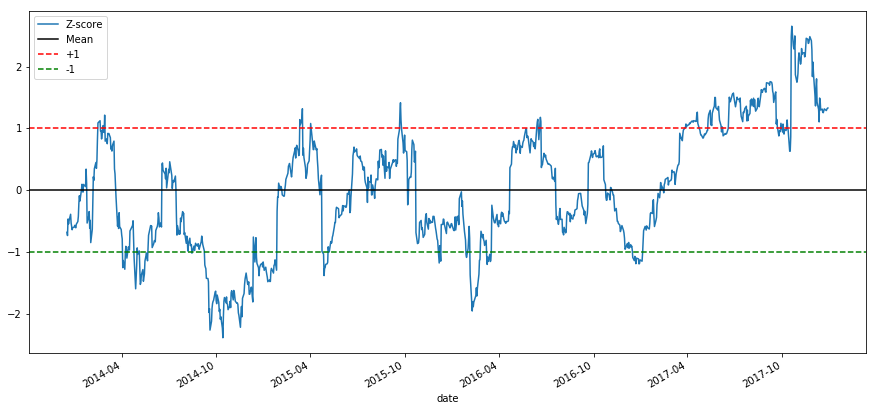

In [31]:
zscore(ratio).plot(figsize=(15,7))
plt.axhline(zscore(ratio).mean(), color='black')
plt.axhline(1.0, color='r', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Z-score', 'Mean', '+1', '-1'])

In [32]:
train = ratio[:800]
test = ratio[800:]

In [33]:
ratio_ma5 = train.rolling(window=5).mean()
ratio_ma60 = train.rolling(window=60).mean()
std_60 = train.rolling(window=60).std()
zscore = (ratio_ma5 - ratio_ma60) / std_60

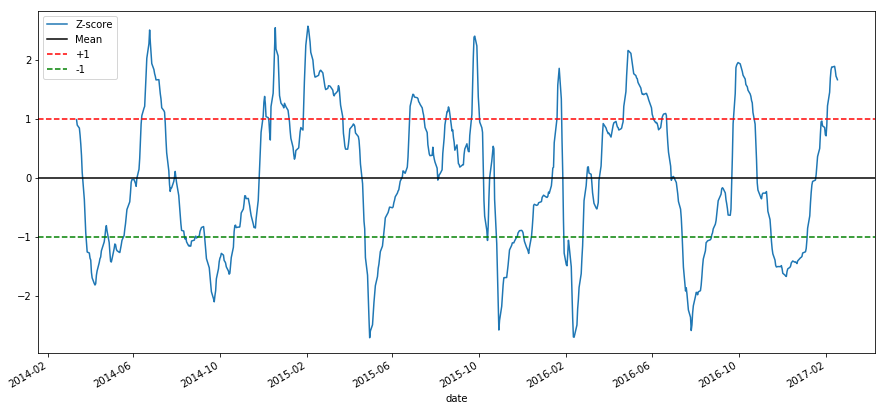

In [34]:
zscore.plot(figsize=(15,7))
plt.axhline(0, color='black')
plt.axhline(1.0, color='r', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Z-score', 'Mean', '+1', '-1'])
plt.show()

In [ ]:
buy 